### lets understand and learn aboute the effect of SMOTE on accuracy of model 

#### firstly i have use the data related to the _breast_cancer having the uneven sprade of data for distribution 

In [65]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [64]:
bc_bunch1.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(bc_bunch1.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [12]:
cancer_df = pd.DataFrame(bc_bunch1.data,columns=bc_bunch1.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
cancer_df["class"] = bc_bunch1.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### imp information about data 
#### Class Distribution: 
##### 212 - Malignant, 357 - Benign

<Axes: >

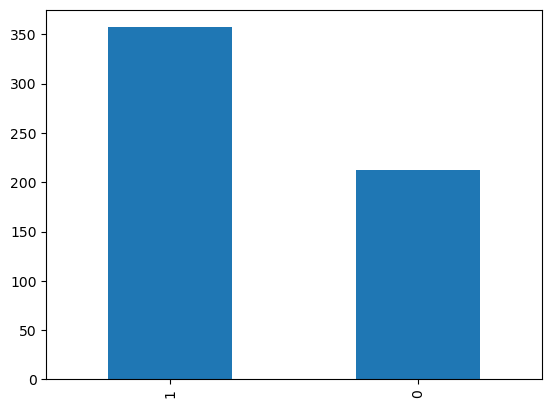

In [14]:
#lets draw a bar plot to seethe class imbalance 
cancer_df["class"].value_counts().plot.bar()

In [15]:
cancer_df["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

#### we can infer that 
#####  357 == Benign
#####   212 ==  Malignant

In [16]:
### separate the x and y coloums 
x = cancer_df.drop("class",axis =1)
y = cancer_df["class"]

### split for train and test 

In [17]:
from sklearn.model_selection  import train_test_split

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size = 0.3 ,random_state= 21)

In [19]:
print("shape od x train is ", x_train.shape)
print("shape od y train is ", y_train.shape)
print("shape od x  test  is ", x_test.shape)
print("shape od y test  is ", y_test.shape)

shape od x train is  (398, 30)
shape od y train is  (398,)
shape od x  test  is  (171, 30)
shape od y test  is  (171,)


# building the logistic regression model 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logistic_reg = LogisticRegression(solver = "liblinear")

In [22]:
logistic_reg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [23]:
y_predict = logistic_reg.predict(x_test)

In [24]:
y_predict_train = logistic_reg.predict(x_train)

** evaluation of classification model 

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("accuracy score of the given dataset is ")
print(accuracy_score(y_test,y_predict))

accuracy score of the given dataset is 
0.9473684210526315


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [29]:
## accuracy of train data 
print("accuracy of the train data is ::")
print(accuracy_score(y_train,y_predict_train))

accuracy of the train data is ::
0.9547738693467337


#### SMOTE  analysis (synthetic monetaring oversamplling techniique)
##### for the umbalance classes

In [30]:
import imblearn

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
##instuntiatethe object 
oversampling_data = SMOTE()

In [33]:
x_smote,y_smote = oversampling_data.fit_resample(x,y)

In [34]:
print(x_smote.shape)

(714, 30)


In [36]:
y_smote.value_counts()

0    357
1    357
Name: class, dtype: int64

** the problem of imbalanced class is handeled using the SMOTE  analysis

In [43]:
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote,test_size = 0.3,random_state=21)

In [48]:
logistic_regg_smote = LogisticRegression(solver = "liblinear")

In [51]:
logistic_regg_smote.fit(x_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [54]:
y_predic_smote_test = logistic_regg_smote.predict(x_test_smote)

In [56]:
print('accuracy for the give model for test data is:')
accuracy_score(y_test_smote,y_predic_smote_test)

accuracy for the give model for test data is:


0.9627906976744186

In [57]:
y_predct_train_smote = logistic_regg_smote.predict(x_train_smote)

In [58]:
print("accuracy of thegiven model for the train data is ")
accuracy_score(y_train_smote,y_predct_train_smote)

accuracy of thegiven model for the train data is 


0.9659318637274549

### **Lets differnciate the inferance
#### **the  accurancy score before smote is ::
#### *accuracy score of the test data for given dataset is:: 
0.9473684210526315
#### *accuracy of the train data is ::
0.9547738693467337
#### **the  accurancy score after smote is ::
##### *accuracy for the give model for test data is:
0.9627906976744186
##### *accuracy of thegiven model for the train data is 
0.9659318637274549

#### So we can infer that is distribution of the classes are even ther model accuracy is going to increase so it's better to have even classes distribution

In [62]:
print(classification_report(y_test_smote,y_predic_smote_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       110
           1       0.94      0.98      0.96       105

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [63]:
print(classification_report(y_train_smote,y_predct_train_smote))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       247
           1       0.97      0.96      0.97       252

    accuracy                           0.97       499
   macro avg       0.97      0.97      0.97       499
weighted avg       0.97      0.97      0.97       499

